# Photonics reservoir computing (fourth order approximation of differential equations)

In [1]:
import numpy as np
import matplotlib.pyplot as plt

## Functions used for the simulation

In [2]:
def fnlx(x,y,u,xtau,parameters):
    tau_L = parameters[0]
    tau_H = parameters[1]
    beta = parameters[2]
    kappa = parameters[3]
    phi_0 = parameters[4]
    return -(1/tau_L+1/tau_H)*x - y/tau_L + beta/tau_L*(np.cos(kappa*xtau+np.pi/4*u+phi_0))**2

def fnly(x,parameters):
    tau_H = parameters[1]
    return 1/tau_H*x

### Physical parameters

In [3]:
delay=239.6e-9
tau_L = 1 / (12.5e9*2*np.pi)
tau_H = 1/ (0.625e6*2*np.pi)
beta = 1
kappa = 0.9
phi_0 = -0.25*np.pi
parameters = [tau_L,tau_H,beta,kappa,phi_0]

### Simulation parameters

In [4]:
deltat = 1e-11
T = 1e-5
ntau = int(np.floor(delay/deltat))
nT = int(np.floor(T/deltat))

## No input

### Initialize state vectors with initial conditions

In [5]:
# Initialise state vectors
Xp = np.zeros(nT+3)
Xc = np.zeros(nT+3)
Y = np.zeros(nT)

# Initial conditions
Xp[0:ntau+3] = 0.01 * np.random.normal(loc=0.0, scale=1.0, size=(ntau+3))
Xc[0:ntau+3] = 0.01 * np.random.normal(loc=0.0, scale=1.0, size=(ntau+3))
Y[0:ntau] = 0.01 * np.random.normal(loc=0.0, scale=1.0, size=(ntau))
U = np.zeros(nT-ntau-4)

### Running the simulation (fourth order approximation)

In [7]:
for n in range(ntau+3,nT-1):
    
    Xp[n+1] = Xc[n] + deltat/24*(55*fnlx(Xc[n],Y[n],U[n-ntau-3], Xc[n-ntau],parameters)-59*fnlx(Xc[n-1],Y[n-1],U[n-ntau-3],Xc[n-ntau-1],parameters)+37*fnlx(Xc[n-2],Y[n-2],U[n-ntau-3],Xc[n-ntau-2],parameters)-9*fnlx(Xc[n-3],Y[n-3],U[n-ntau-3],Xc[n-ntau-3],parameters))
    Y[n+1] = Y[n] + deltat*fnly(Xc[n],parameters)
    Xc[n+1] = Xc[n] + deltat/24*(9*fnlx(Xp[n+1],Y[n+1],U[n-ntau-3],Xc[n-ntau+1],parameters)+19*fnlx(Xc[n],Y[n],U[n-ntau-3],Xc[n-ntau],parameters)-5*fnlx(Xc[n-1],Y[n-1],U[n-ntau-3],Xc[n-ntau-1],parameters)+fnlx(Xc[n-2],Y[n-2],U[n-ntau-3],Xc[n-ntau-2],parameters))

### Results of the simulation

#### X variable

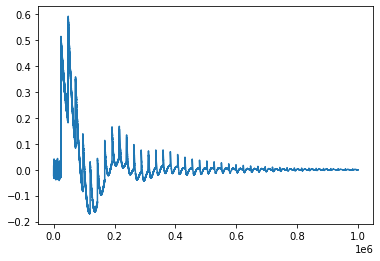

In [8]:
plt.plot(Xc)
plt.show()

#### Y variable

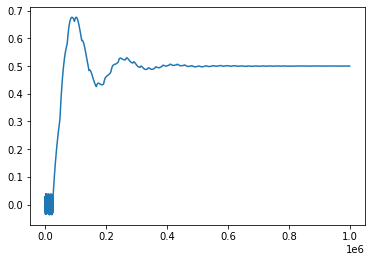

In [9]:
plt.plot(Y)
plt.show()

## Sinusoidal input

### Initialize state vectors with initial conditions

In [10]:
# Initialise state vectors
Xp = np.zeros(nT+3)
Xc = np.zeros(nT+3)
Y = np.zeros(nT)

# Initial conditions
Xp[0:ntau+3] = 0.01 * np.random.normal(loc=0.0, scale=1.0, size=(ntau+3))
Xc[0:ntau+3] = 0.01 * np.random.normal(loc=0.0, scale=1.0, size=(ntau+3))
Y[0:ntau] = 0.01 * np.random.normal(loc=0.0, scale=1.0, size=(ntau))

### Input

In [11]:
# Input
t = np.linspace(0, 1, num=nT-ntau-4)
U = np.sin(100*np.pi*t)

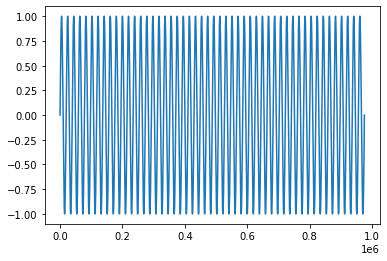

In [12]:
plt.plot(U)
plt.show()

### Running the simulation (fourth order approximation)

In [13]:
for n in range(ntau+3,nT-1):
    
    Xp[n+1] = Xc[n] + deltat/24*(55*fnlx(Xc[n],Y[n],U[n-ntau-3], Xc[n-ntau],parameters)-59*fnlx(Xc[n-1],Y[n-1],U[n-ntau-3],Xc[n-ntau-1],parameters)+37*fnlx(Xc[n-2],Y[n-2],U[n-ntau-3],Xc[n-ntau-2],parameters)-9*fnlx(Xc[n-3],Y[n-3],U[n-ntau-3],Xc[n-ntau-3],parameters))
    Y[n+1] = Y[n] + deltat*fnly(Xc[n],parameters)
    Xc[n+1] = Xc[n] + deltat/24*(9*fnlx(Xp[n+1],Y[n+1],U[n-ntau-3],Xc[n-ntau+1],parameters)+19*fnlx(Xc[n],Y[n],U[n-ntau-3],Xc[n-ntau],parameters)-5*fnlx(Xc[n-1],Y[n-1],U[n-ntau-3],Xc[n-ntau-1],parameters)+fnlx(Xc[n-2],Y[n-2],U[n-ntau-3],Xc[n-ntau-2],parameters))

### Results of the simulation

#### X variable

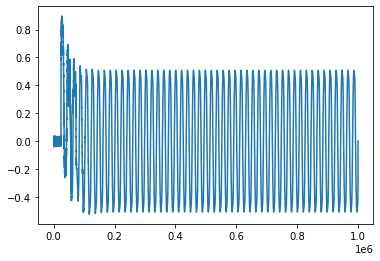

In [14]:
plt.plot(Xc)
plt.show()

#### Y variable

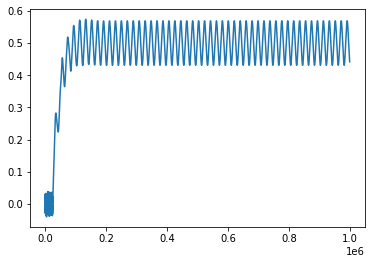

In [15]:
plt.plot(Y)
plt.show()

## Step input

### Initialize state vectors with initial conditions

In [16]:
# Initialise state vectors
Xp = np.zeros(nT+3)
Xc = np.zeros(nT+3)
Y = np.zeros(nT)

# Initial conditions
Xp[0:ntau+3] = 0.01 * np.random.normal(loc=0.0, scale=1.0, size=(ntau+3))
Xc[0:ntau+3] = 0.01 * np.random.normal(loc=0.0, scale=1.0, size=(ntau+3))
Y[0:ntau] = 0.01 * np.random.normal(loc=0.0, scale=1.0, size=(ntau))

### Input

In [17]:
# Input
first_half = (nT-ntau-4)//2
second_half = nT-ntau-4 - first_half
U = np.concatenate([np.zeros(first_half), np.ones(second_half)])

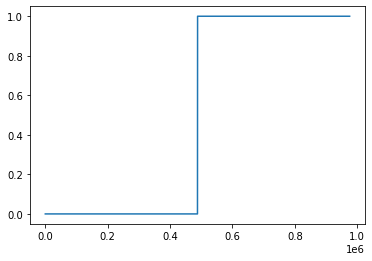

In [18]:
plt.plot(U)
plt.show()

### Running the simulation (fourth order approximation)

In [19]:
for n in range(ntau+3,nT-1):
    
    Xp[n+1] = Xc[n] + deltat/24*(55*fnlx(Xc[n],Y[n],U[n-ntau-3], Xc[n-ntau],parameters)-59*fnlx(Xc[n-1],Y[n-1],U[n-ntau-3],Xc[n-ntau-1],parameters)+37*fnlx(Xc[n-2],Y[n-2],U[n-ntau-3],Xc[n-ntau-2],parameters)-9*fnlx(Xc[n-3],Y[n-3],U[n-ntau-3],Xc[n-ntau-3],parameters))
    Y[n+1] = Y[n] + deltat*fnly(Xc[n],parameters)
    Xc[n+1] = Xc[n] + deltat/24*(9*fnlx(Xp[n+1],Y[n+1],U[n-ntau-3],Xc[n-ntau+1],parameters)+19*fnlx(Xc[n],Y[n],U[n-ntau-3],Xc[n-ntau],parameters)-5*fnlx(Xc[n-1],Y[n-1],U[n-ntau-3],Xc[n-ntau-1],parameters)+fnlx(Xc[n-2],Y[n-2],U[n-ntau-3],Xc[n-ntau-2],parameters))

### Results of the simulation

#### X variable

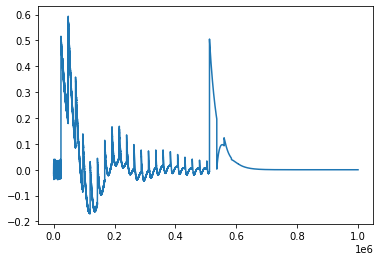

In [20]:
plt.plot(Xc)
plt.show()

#### Y variable

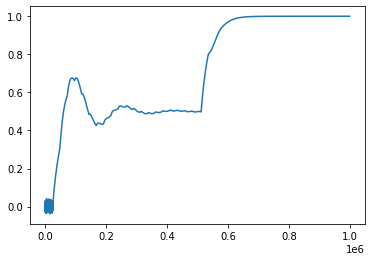

In [21]:
plt.plot(Y)
plt.show()